## Lab 3. Disparity map
**Ignashov V.M. 9303**


In [40]:
import cv2
from matplotlib import pyplot as plt

### Defining variables and collecting images

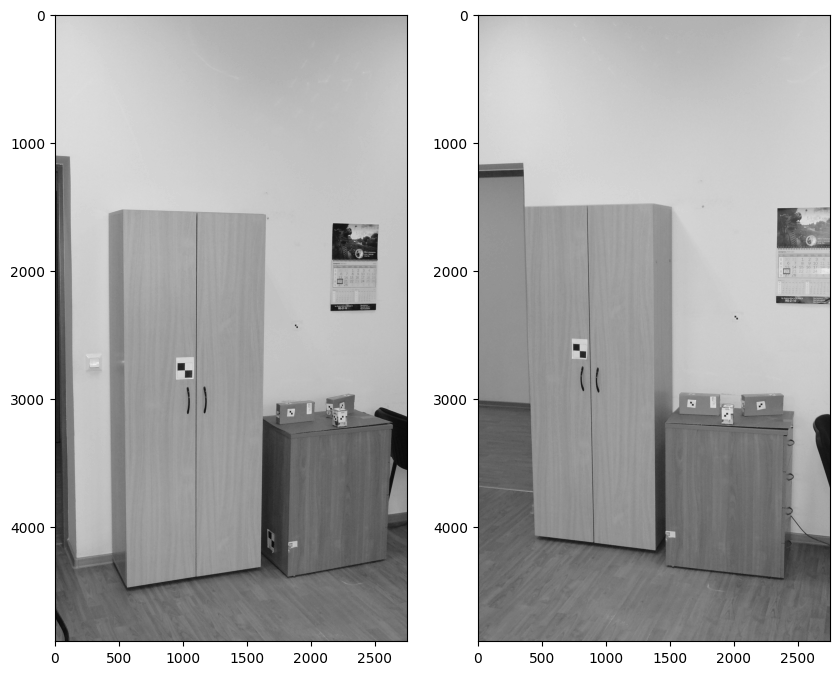

In [41]:
IMG_LEFT_PATH, IMG_RIGHT_PATH = './data/source_images/DSC02694.JPG', './data/source_images/DSC02692.JPG'
image_left, image_right = cv2.imread(IMG_LEFT_PATH, 0), cv2.imread(IMG_RIGHT_PATH, 0)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
for i, img in enumerate([image_left, image_right]):
    ax[i].imshow(img, 'gray')
plt.show()

### Setting parameters

In [42]:
block_size = 11 # the size of block used for matching
min_disparity, max_disparity = -128, 128 # min/max disparity
num_disparities = max_disparity - min_disparity # disparity search range
uniqueness_ratio = 5 # threshold for uniqueness of disparity
speckle_window_size = 25 # maximum size of speckles to be removed
speckle_range = 2 # max difference in intensity value (noise) 
disp12_max_diff = 0 # max allowed difference in the left-right disparity check

### Creating StereoSGBM and normalizing values

In [43]:
stereo = cv2.StereoSGBM.create(
    minDisparity=min_disparity,
    numDisparities=num_disparities,
    blockSize=block_size,
    uniquenessRatio=uniqueness_ratio,
    speckleWindowSize=speckle_window_size,
    speckleRange=speckle_range,
    disp12MaxDiff=disp12_max_diff
)
disparity_SGBM = stereo.compute(image_left, image_right)

# Normalizing values to a range from 0..255 for a grayscale image
disparity_SGBM = cv2.normalize(disparity_SGBM, disparity_SGBM, alpha=255, beta=0, norm_type=cv2.NORM_MINMAX)

### Write image to a file and show

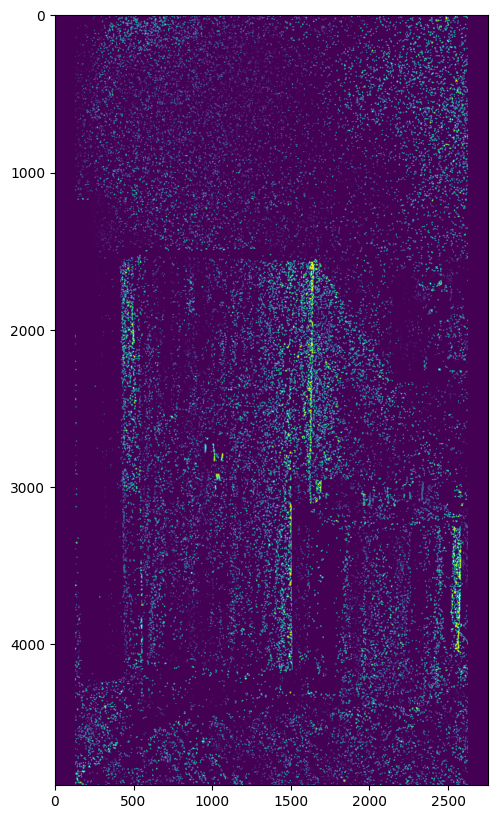

In [44]:
cv2.imwrite("data/results/disparity_SGBM_norm.png", disparity_SGBM)
plt.figure(figsize=(15, 10))
plt.imshow(disparity_SGBM)
plt.show()